# Preface

Forest is an application that is based on the Pomodoro technique that tracks "focused hours" from durations ranging from 10 minutes to 2 hours. It allows custom tagging and exports to CSV. This project serves as practise for basic data wrangling and descriptive statistics. The data set that is presented spans from May 2019 to May 2020.

After a full academic year of using Forest for every study session, here are the goals and insights I want to glean from the data.



## Main Questions

- Find out what timings during which I am the most productive
- Visualize trends in focused time over the span of available data
    - Frequency distribution / histogram ??
- Find the relative payoffs for the time invested vs the grades received for each module 
    - Find an estimate for the amount of time invested to move through each letter grade
    
    
## Key Assumptions
- For this study, focused time is assumed to be a representation of productivity, while controlling for proper tags

# Data Cleaning/Reorganizing

## Importing relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import sklearn

## Reading in the data set

In [2]:
forest_df = pd.read_csv("Forest Data.csv")

forest_df.head()

,Start Time,End Time,Tag,Note,Tree Type,Is Success
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Rodrigo - Toccata,Bush,True
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Rodrigo Tocatta recording,Cedar,True
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,LSD,Cedar,True
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Barrios Valse: Arpeggio section,Cedar,True
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Revising Barrios Valse and finishing up,Cedar,True


## Dropping irrelevant columns 
- Tree type
- Note

In [3]:
forest_df.drop(columns = ["Tree Type", "Note", "Is Success"], inplace = True)

forest_df.head()

,Start Time,End Time,Tag
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar


## Creating new columns for day/date
Only factoring in the start time to avoid handling tricky exceptions when sessions cross over to the next day
e.g. Studying during midnight

In [4]:
def retrieve_day(inp):
    """ 
    Takes each row in "Start Time" column and uses string slicing to acquire the day of the week
    
    """
    return inp[0:3]

def retrieve_date(inp):
    """ 
    Uses string slicing to acquire the respective index numbers of the string for the month, date and year
    
    Organizes the information in a presentable string
    
    """
    date = str(inp[8:10])
    month = str(inp[4:7])
    year = str(inp[-4:])
    return str(date + " " + month + " " + year)

forest_df["Day"] = forest_df["Start Time"].apply(retrieve_day)
forest_df["Date"] = forest_df["Start Time"].apply(retrieve_date)

forest_df

,Start Time,End Time,Tag,Day,Date
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,19 May 2018
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,19 May 2018
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,19 May 2018
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,20 May 2018
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,23 May 2018
...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,11 May 2020
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,12 May 2020
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,12 May 2020
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,12 May 2020


## Creating new columns for start and end time

In [5]:
def retrieve_start(inp):
    """
    Takes each row in "Start Time" column and uses string slicing to acquire time started
    
    """
    return inp[11:19]


def retrieve_end(inp):
    """
    Takes each row in "Start Time" column and uses string slicing to acquire time ended
    
    """
    return inp[11:19]

forest_df["Time Started"] = forest_df["Start Time"].apply(retrieve_start)
forest_df["Time Ended"] = forest_df["End Time"].apply(retrieve_end)

forest_df


,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,19 May 2018,13:14:55,13:34:55
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,19 May 2018,15:28:31,16:08:31
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,19 May 2018,19:26:53,21:26:53
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,20 May 2018,11:21:02,12:21:02
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,23 May 2018,11:56:43,13:56:43
...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,11 May 2020,16:37:01,17:37:01
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,12 May 2020,09:27:56,10:27:56
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,12 May 2020,10:50:19,11:50:19
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,12 May 2020,16:17:08,17:17:08


## Calculating the difference between start and end time

Will I end up with negative values if the algorithm sees that the timing has crossed over to the next day?

In [6]:
# Converting the data types of the relevant time columns
forest_df["Time Started"] = pd.to_datetime(forest_df["Time Started"])
forest_df["Time Ended"] = pd.to_datetime(forest_df["Time Ended"])

forest_df["Time Difference"] = forest_df["Time Ended"] - forest_df["Time Started"]

forest_df["Length of Focused Time in Minutes"] = forest_df["Time Difference"] / np.timedelta64(1, "m")

forest_df

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,19 May 2018,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,20 May 2018,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,23 May 2018,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0
...,...,...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,11 May 2020,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,12 May 2020,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0


In [7]:
# Checking for outliers (Negative time values)
cond = forest_df["Length of Focused Time in Minutes"] < 0

bool_df = forest_df[cond]

bool_df.head()

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes
126,Sun Jun 30 23:37:07 GMT+08:00 2019,Mon Jul 01 00:07:07 GMT+08:00 2019,Unset,Sun,30 Jun 2019,2020-08-21 23:37:07,2020-08-21 00:07:07,-1 days +00:30:00,-1410.0
132,Tue Jul 02 23:34:23 GMT+08:00 2019,Wed Jul 03 00:04:23 GMT+08:00 2019,Kindle,Tue,02 Jul 2019,2020-08-21 23:34:23,2020-08-21 00:04:23,-1 days +00:30:00,-1410.0
147,Sat Jul 13 23:56:09 GMT+08:00 2019,Sun Jul 14 00:26:09 GMT+08:00 2019,Kindle,Sat,13 Jul 2019,2020-08-21 23:56:09,2020-08-21 00:26:09,-1 days +00:30:00,-1410.0
153,Tue Jul 16 23:57:45 GMT+08:00 2019,Wed Jul 17 00:27:45 GMT+08:00 2019,Kindle,Tue,16 Jul 2019,2020-08-21 23:57:45,2020-08-21 00:27:45,-1 days +00:30:00,-1410.0
156,Wed Jul 17 23:38:13 GMT+08:00 2019,Thu Jul 18 00:08:13 GMT+08:00 2019,Kindle,Wed,17 Jul 2019,2020-08-21 23:38:13,2020-08-21 00:08:13,-1 days +00:30:00,-1410.0


## Addressing dirty data (negative difference values)

In [8]:
# Addressing the outliers by taking the last few characters of "Time Difference" column, which has the length of the session indicated

def retrieve_timing(diff):
    """
    Takes each row in "Time Difference" column and uses string slicing to acquire time difference
    
    """
    return diff[9:17]

bool_df.loc[:, "Time Difference"] = bool_df["Time Difference"].astype(str)

bool_df.loc[:, "Time Difference"] = bool_df["Time Difference"].apply(retrieve_timing)

# Converting the column back from string into timedelta
bool_df.loc[:, "Time Difference"] = pd.to_timedelta(bool_df["Time Difference"], unit = "m")
bool_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes
126,Sun Jun 30 23:37:07 GMT+08:00 2019,Mon Jul 01 00:07:07 GMT+08:00 2019,Unset,Sun,30 Jun 2019,2020-08-21 23:37:07,2020-08-21 00:07:07,00:30:00,-1410.0
132,Tue Jul 02 23:34:23 GMT+08:00 2019,Wed Jul 03 00:04:23 GMT+08:00 2019,Kindle,Tue,02 Jul 2019,2020-08-21 23:34:23,2020-08-21 00:04:23,00:30:00,-1410.0
147,Sat Jul 13 23:56:09 GMT+08:00 2019,Sun Jul 14 00:26:09 GMT+08:00 2019,Kindle,Sat,13 Jul 2019,2020-08-21 23:56:09,2020-08-21 00:26:09,00:30:00,-1410.0
153,Tue Jul 16 23:57:45 GMT+08:00 2019,Wed Jul 17 00:27:45 GMT+08:00 2019,Kindle,Tue,16 Jul 2019,2020-08-21 23:57:45,2020-08-21 00:27:45,00:30:00,-1410.0
156,Wed Jul 17 23:38:13 GMT+08:00 2019,Thu Jul 18 00:08:13 GMT+08:00 2019,Kindle,Wed,17 Jul 2019,2020-08-21 23:38:13,2020-08-21 00:08:13,00:30:00,-1410.0


In [9]:
# Replacing the outliers in the original dataframe

forest_df.update(bool_df)

# Double checking if outliers are still present in "Time Difference"
display(forest_df[cond]) # There are no "-1 days" entries under "Time Difference"

# Double Checking the data type of "Time Difference"
forest_df["Time Difference"] # The datatype is timedelta64

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes
126,Sun Jun 30 23:37:07 GMT+08:00 2019,Mon Jul 01 00:07:07 GMT+08:00 2019,Unset,Sun,30 Jun 2019,2020-08-21 23:37:07,2020-08-21 00:07:07,00:30:00,-1410.000000
132,Tue Jul 02 23:34:23 GMT+08:00 2019,Wed Jul 03 00:04:23 GMT+08:00 2019,Kindle,Tue,02 Jul 2019,2020-08-21 23:34:23,2020-08-21 00:04:23,00:30:00,-1410.000000
147,Sat Jul 13 23:56:09 GMT+08:00 2019,Sun Jul 14 00:26:09 GMT+08:00 2019,Kindle,Sat,13 Jul 2019,2020-08-21 23:56:09,2020-08-21 00:26:09,00:30:00,-1410.000000
153,Tue Jul 16 23:57:45 GMT+08:00 2019,Wed Jul 17 00:27:45 GMT+08:00 2019,Kindle,Tue,16 Jul 2019,2020-08-21 23:57:45,2020-08-21 00:27:45,00:30:00,-1410.000000
156,Wed Jul 17 23:38:13 GMT+08:00 2019,Thu Jul 18 00:08:13 GMT+08:00 2019,Kindle,Wed,17 Jul 2019,2020-08-21 23:38:13,2020-08-21 00:08:13,00:30:00,-1410.000000
168,Mon Jul 22 23:22:58 GMT+08:00 2019,Tue Jul 23 00:14:43 GMT+08:00 2019,Guitar,Mon,22 Jul 2019,2020-08-21 23:22:58,2020-08-21 00:14:43,00:51:45,-1388.250000
173,Mon Jul 29 23:35:44 GMT+08:00 2019,Tue Jul 30 00:06:32 GMT+08:00 2019,Guitar,Mon,29 Jul 2019,2020-08-21 23:35:44,2020-08-21 00:06:32,00:30:48,-1409.200000
182,Mon Aug 05 23:39:08 GMT+08:00 2019,Tue Aug 06 01:15:10 GMT+08:00 2019,Guitar,Mon,05 Aug 2019,2020-08-21 23:39:08,2020-08-21 01:15:10,01:36:02,-1343.966667
186,Thu Aug 08 23:48:07 GMT+08:00 2019,Fri Aug 09 00:51:08 GMT+08:00 2019,Guitar,Thu,08 Aug 2019,2020-08-21 23:48:07,2020-08-21 00:51:08,01:03:01,-1376.983333
188,Sun Aug 11 23:29:43 GMT+08:00 2019,Mon Aug 12 00:01:37 GMT+08:00 2019,Unset,Sun,11 Aug 2019,2020-08-21 23:29:43,2020-08-21 00:01:37,00:31:54,-1408.100000


0      00:20:00
1      00:40:00
2      02:00:00
3      01:00:00
4      02:00:00
         ...   
1400   01:00:00
1401   01:00:00
1402   01:00:00
1403   01:00:00
1404   01:00:00
Name: Time Difference, Length: 1405, dtype: timedelta64[ns]

In [10]:
# Rerunning operation to tabulate "Time Difference in Minutes"
forest_df["Length of Focused Time in Minutes"] = forest_df["Time Difference"] / np.timedelta64(1, "m")

# Checking for negative "Time Difference in Minutes" values
display((forest_df["Length of Focused Time in Minutes"] <= 0).any())

forest_df

False

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,19 May 2018,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,20 May 2018,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,23 May 2018,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0
...,...,...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,11 May 2020,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,12 May 2020,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0


## Extracting the Start Time into a New Column

In [11]:
def extract_starttime(inp):
    """
    Takes each row in "Start Time" column and uses string slicing to acquire start time
    
    """
    return inp[11:19]

forest_df.loc[:, "Start Time in timedelta"] = forest_df["Start Time"].apply(extract_starttime)

forest_df["Start Time in timedelta"] = pd.to_datetime(forest_df["Start Time in timedelta"])

forest_df

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes,Start Time in timedelta
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0,2020-08-21 13:14:55
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0,2020-08-21 15:28:31
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,19 May 2018,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0,2020-08-21 19:26:53
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,20 May 2018,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0,2020-08-21 11:21:02
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,23 May 2018,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0,2020-08-21 11:56:43
...,...,...,...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,11 May 2020,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0,2020-08-21 16:37:01
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0,2020-08-21 09:27:56
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0,2020-08-21 10:50:19
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,12 May 2020,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0,2020-08-21 16:17:08


In [12]:
# Rounding to the nearest 30 minute interval

forest_df["Start Time Rounded"] = forest_df["Start Time in timedelta"].dt.round("30min").dt.time

forest_df

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes,Start Time in timedelta,Start Time Rounded
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0,2020-08-21 13:14:55,13:00:00
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,19 May 2018,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0,2020-08-21 15:28:31,15:30:00
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,19 May 2018,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0,2020-08-21 19:26:53,19:30:00
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,20 May 2018,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0,2020-08-21 11:21:02,11:30:00
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,23 May 2018,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0,2020-08-21 11:56:43,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,11 May 2020,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0,2020-08-21 16:37:01,16:30:00
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0,2020-08-21 09:27:56,09:30:00
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,12 May 2020,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0,2020-08-21 10:50:19,11:00:00
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,12 May 2020,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0,2020-08-21 16:17:08,16:30:00


# Preparing Data for Visualization
- Integer encoding the month
- Integer encoding the day of the week
- One Hot encoding for the Tags (??) - Depends if I want to use it for some predictive purposes

## Integer Encoding the Dates (Month and Day of the Week)

In [13]:
# Integer encoding the month
forest_df["Date"] = pd.to_datetime(forest_df["Date"])

forest_df["Month"] = forest_df["Date"].dt.month

forest_df

# forest_df.groupby([Date_Int, "Length of Focused Time in Minutes"]).describe()

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes,Start Time in timedelta,Start Time Rounded,Month
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,2018-05-19,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0,2020-08-21 13:14:55,13:00:00,5
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,2018-05-19,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0,2020-08-21 15:28:31,15:30:00,5
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,2018-05-19,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0,2020-08-21 19:26:53,19:30:00,5
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,2018-05-20,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0,2020-08-21 11:21:02,11:30:00,5
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,2018-05-23,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0,2020-08-21 11:56:43,12:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,2020-05-11,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0,2020-08-21 16:37:01,16:30:00,5
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,2020-05-12,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0,2020-08-21 09:27:56,09:30:00,5
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,2020-05-12,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0,2020-08-21 10:50:19,11:00:00,5
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,2020-05-12,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0,2020-08-21 16:17:08,16:30:00,5


In [14]:
# Integer encoding the day of the week

dict_encode = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}

forest_df.loc[:, "Day_Int"] = forest_df["Day"].map(dict_encode)

forest_df

,Start Time,End Time,Tag,Day,Date,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes,Start Time in timedelta,Start Time Rounded,Month,Day_Int
0,Sat May 19 13:14:55 GMT+08:00 2018,Sat May 19 13:34:55 GMT+08:00 2018,Guitar,Sat,2018-05-19,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0,2020-08-21 13:14:55,13:00:00,5,6
1,Sat May 19 15:28:31 GMT+08:00 2018,Sat May 19 16:08:31 GMT+08:00 2018,Guitar,Sat,2018-05-19,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0,2020-08-21 15:28:31,15:30:00,5,6
2,Sat May 19 19:26:53 GMT+08:00 2018,Sat May 19 21:26:53 GMT+08:00 2018,Unset,Sat,2018-05-19,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0,2020-08-21 19:26:53,19:30:00,5,6
3,Sun May 20 11:21:02 GMT+08:00 2018,Sun May 20 12:21:02 GMT+08:00 2018,Guitar,Sun,2018-05-20,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0,2020-08-21 11:21:02,11:30:00,5,7
4,Wed May 23 11:56:43 GMT+08:00 2018,Wed May 23 13:56:43 GMT+08:00 2018,Guitar,Wed,2018-05-23,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0,2020-08-21 11:56:43,12:00:00,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,Mon May 11 16:37:01 GMT+08:00 2020,Mon May 11 17:37:01 GMT+08:00 2020,HE2022,Mon,2020-05-11,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0,2020-08-21 16:37:01,16:30:00,5,1
1401,Tue May 12 09:27:56 GMT+08:00 2020,Tue May 12 10:27:56 GMT+08:00 2020,HE1005,Tue,2020-05-12,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0,2020-08-21 09:27:56,09:30:00,5,2
1402,Tue May 12 10:50:19 GMT+08:00 2020,Tue May 12 11:50:19 GMT+08:00 2020,HE1005,Tue,2020-05-12,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0,2020-08-21 10:50:19,11:00:00,5,2
1403,Tue May 12 16:17:08 GMT+08:00 2020,Tue May 12 17:17:08 GMT+08:00 2020,Guitar,Tue,2020-05-12,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0,2020-08-21 16:17:08,16:30:00,5,2


## Dropping Redundant Columns and Reorganizing Dataframe

In [15]:
# Dropping redundant columns

forest_df.drop(["Start Time", "End Time"], axis = 1, inplace = True)

# Reorganizing Dataframe
forest_df = forest_df[["Date", "Day", "Time Started", "Time Ended", "Time Difference", "Length of Focused Time in Minutes", "Start Time Rounded", "Month", "Day_Int", "Tag"]]

forest_df

,Date,Day,Time Started,Time Ended,Time Difference,Length of Focused Time in Minutes,Start Time Rounded,Month,Day_Int,Tag
0,2018-05-19,Sat,2020-08-21 13:14:55,2020-08-21 13:34:55,00:20:00,20.0,13:00:00,5,6,Guitar
1,2018-05-19,Sat,2020-08-21 15:28:31,2020-08-21 16:08:31,00:40:00,40.0,15:30:00,5,6,Guitar
2,2018-05-19,Sat,2020-08-21 19:26:53,2020-08-21 21:26:53,02:00:00,120.0,19:30:00,5,6,Unset
3,2018-05-20,Sun,2020-08-21 11:21:02,2020-08-21 12:21:02,01:00:00,60.0,11:30:00,5,7,Guitar
4,2018-05-23,Wed,2020-08-21 11:56:43,2020-08-21 13:56:43,02:00:00,120.0,12:00:00,5,3,Guitar
...,...,...,...,...,...,...,...,...,...,...
1400,2020-05-11,Mon,2020-08-21 16:37:01,2020-08-21 17:37:01,01:00:00,60.0,16:30:00,5,1,HE2022
1401,2020-05-12,Tue,2020-08-21 09:27:56,2020-08-21 10:27:56,01:00:00,60.0,09:30:00,5,2,HE1005
1402,2020-05-12,Tue,2020-08-21 10:50:19,2020-08-21 11:50:19,01:00:00,60.0,11:00:00,5,2,HE1005
1403,2020-05-12,Tue,2020-08-21 16:17:08,2020-08-21 17:17:08,01:00:00,60.0,16:30:00,5,2,Guitar


## Finding total focused time per 30 minute time interval, per month, per tag
- Present the findings in terms of hours

Start Time Rounded
00:00:00     932.233333
00:30:00     525.000000
01:00:00     320.000000
01:30:00     120.000000
02:00:00      60.000000
06:30:00      15.000000
07:00:00     180.000000
07:30:00     300.000000
08:00:00     568.900000
08:30:00    1395.000000
09:00:00    1075.000000
09:30:00     670.016667
10:00:00    1585.066667
10:30:00     975.000000
11:00:00    1649.200000
11:30:00    1767.433333
12:00:00    1435.100000
12:30:00    1196.000000
13:00:00    1181.233333
13:30:00     951.183333
14:00:00    1637.100000
14:30:00    2228.366667
15:00:00    1599.300000
15:30:00    2121.850000
16:00:00    1873.133333
16:30:00    1721.683333
17:00:00    1620.750000
17:30:00    1787.783333
18:00:00    1259.533333
18:30:00    1769.800000
19:00:00    1320.000000
19:30:00    1765.666667
20:00:00    1215.966667
20:30:00    1838.266667
21:00:00    1648.500000
21:30:00    1811.766667
22:00:00    1352.150000
22:30:00    1636.416667
23:00:00    1777.850000
23:30:00    1374.400000
Name: Length of Focus

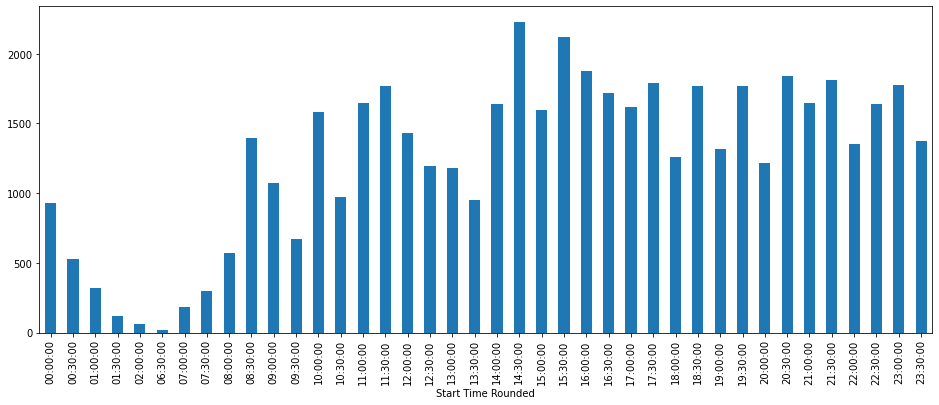

In [24]:
gb_30m = forest_df.groupby("Start Time Rounded")["Length of Focused Time in Minutes"].sum()

gb_30m.plot(figsize = (16,6), kind = "bar")

gb_30m

Day
Fri    6638.716667
Mon    7809.850000
Sat    6994.450000
Sun    5498.466667
Thu    7033.416667
Tue    7564.833333
Wed    8721.916667
Name: Length of Focused Time in Minutes, dtype: float64

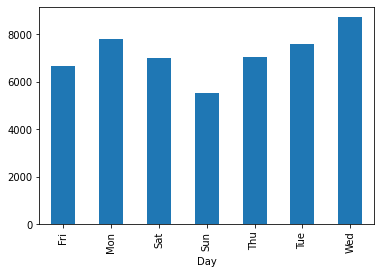

In [25]:
# Gropby Day and Length of Focused Time

gb_day = forest_df.groupby("Day")["Length of Focused Time in Minutes"].sum()

gb_day.plot(kind = "bar")

gb_day

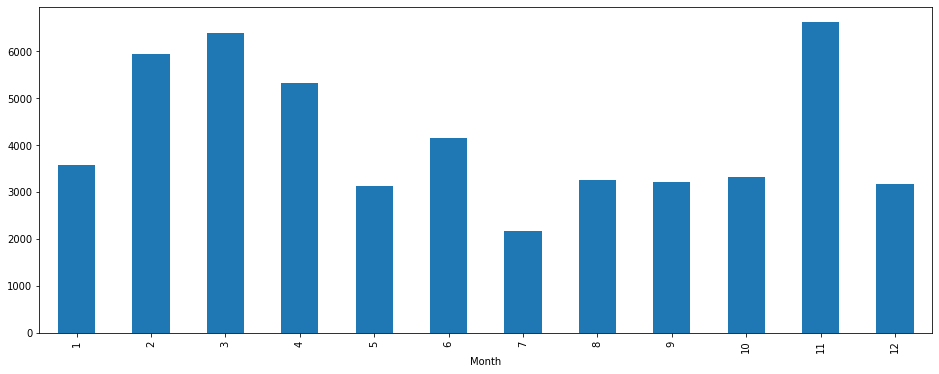

In [26]:
gb_month = forest_df.groupby("Month")["Length of Focused Time in Minutes"].sum()

gb_month.plot(figsize=(16,6), kind = "bar")

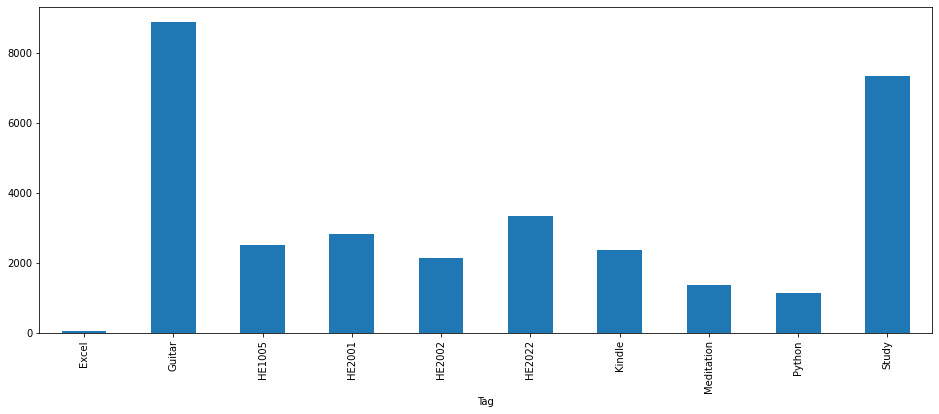

In [30]:
gb_tag = forest_df.groupby("Tag")["Length of Focused Time in Minutes"].sum().drop(["Unset"])

# Dropped Unset column because it overshadows the other tags

gb_tag.plot(figsize=(16,6), kind = "bar")

# Visualization

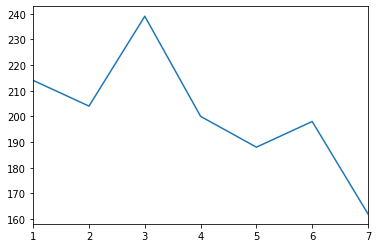

In [20]:
forest_df["Day_Int"].value_counts().sort_index().plot()

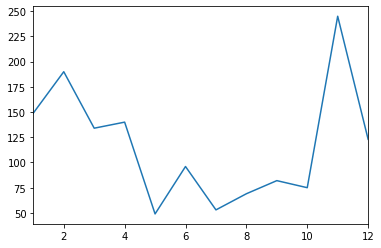

In [21]:
forest_df["Month"].value_counts().sort_index().plot()

# Add more qualities like a title, x/ylabels and a countdist()????

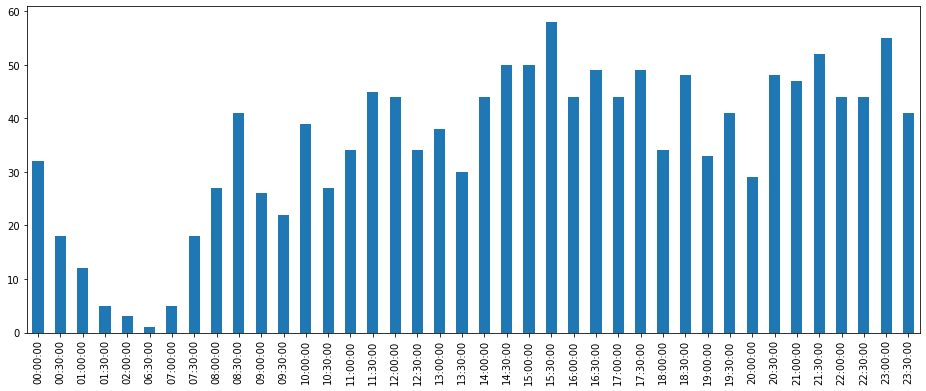

In [37]:
figure = forest_df["Start Time Rounded"].value_counts().sort_index().plot(kind = "bar", figsize = (16, 6))

